In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.font_manager as font_manager

mpl.rc_file('mplrc')
%config InlineBackend.figure_format='retina'

# Add every font at the specified location
font_dir = ['/Users/alelouis/Library/Fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams['font.family'] = 'JetBrains Mono'

In [106]:
R, C = 500, 470e-6

In [107]:
def h(s, R, C):
    return 1/(s * R * C + 1)

In [205]:
sigma = np.linspace(-10, 10, 200)
w = np.concatenate([-np.flip(np.logspace(0, 2, 100)), np.logspace(0, 2, 100)])
S, W = np.meshgrid(sigma, w)
h_s_plane = h(S + 1j*W, R, C)

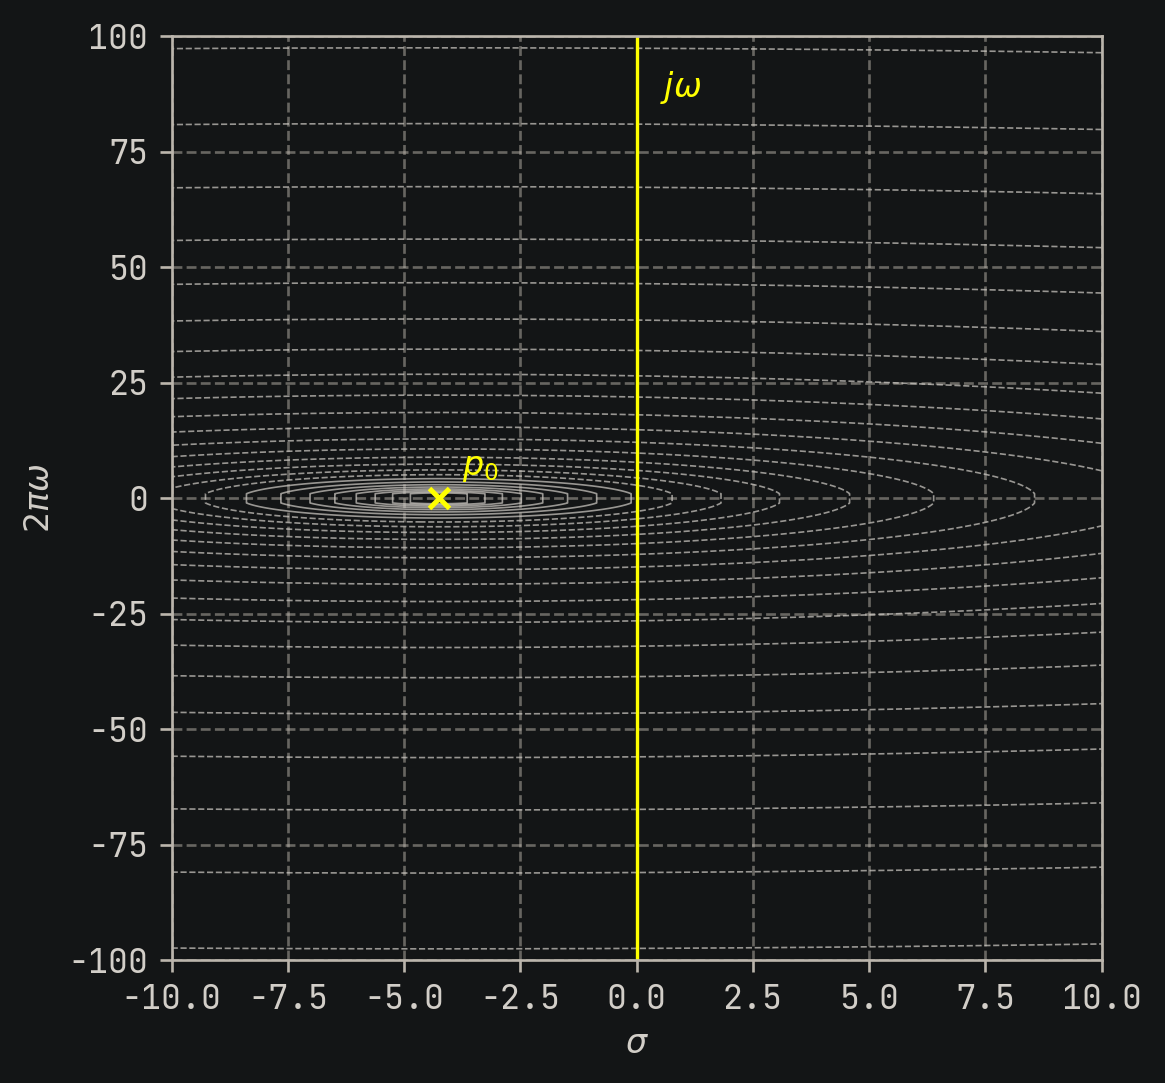

In [225]:
plt.figure(figsize = (5, 5))
plt.contour(sigma, w, 10*np.log10(np.abs(h_s_plane)), colors = "#d2cec8", linewidths = 0.5, levels = 30, alpha = 0.7)
plt.grid(which="minor", linestyle = ":", alpha = 0.5)
plt.grid(which="major", linestyle = "--", alpha = 0.5)
plt.vlines(x=0, ymin = -100, ymax = 100, linewidth = 1 , color = "yellow")
plt.text(0.5, 87, s = r'$jω$', color = "yellow")
plt.scatter(-1/(R*C), 0, marker = 'x', facecolor = "yellow", color = 'y', edgecolor = None, zorder = 100)
plt.text(-1/(R*C)+0.5, 5, s = r'$p_0$', color = "yellow")

plt.xlabel(r'$\sigma$')
plt.ylabel(r'$2\pi\omega$')

plt.savefig('../../public/images/rc-filter/h_s_plane.svg', dpi = 72, transparent=True, bbox_inches='tight')

In [ ]:
f = np.logspace(start=-2, stop=2, num=300)
w = 2*np.pi*f
s = 1j*w
h_s = h(s, R, C)

(0.01, 100.0)

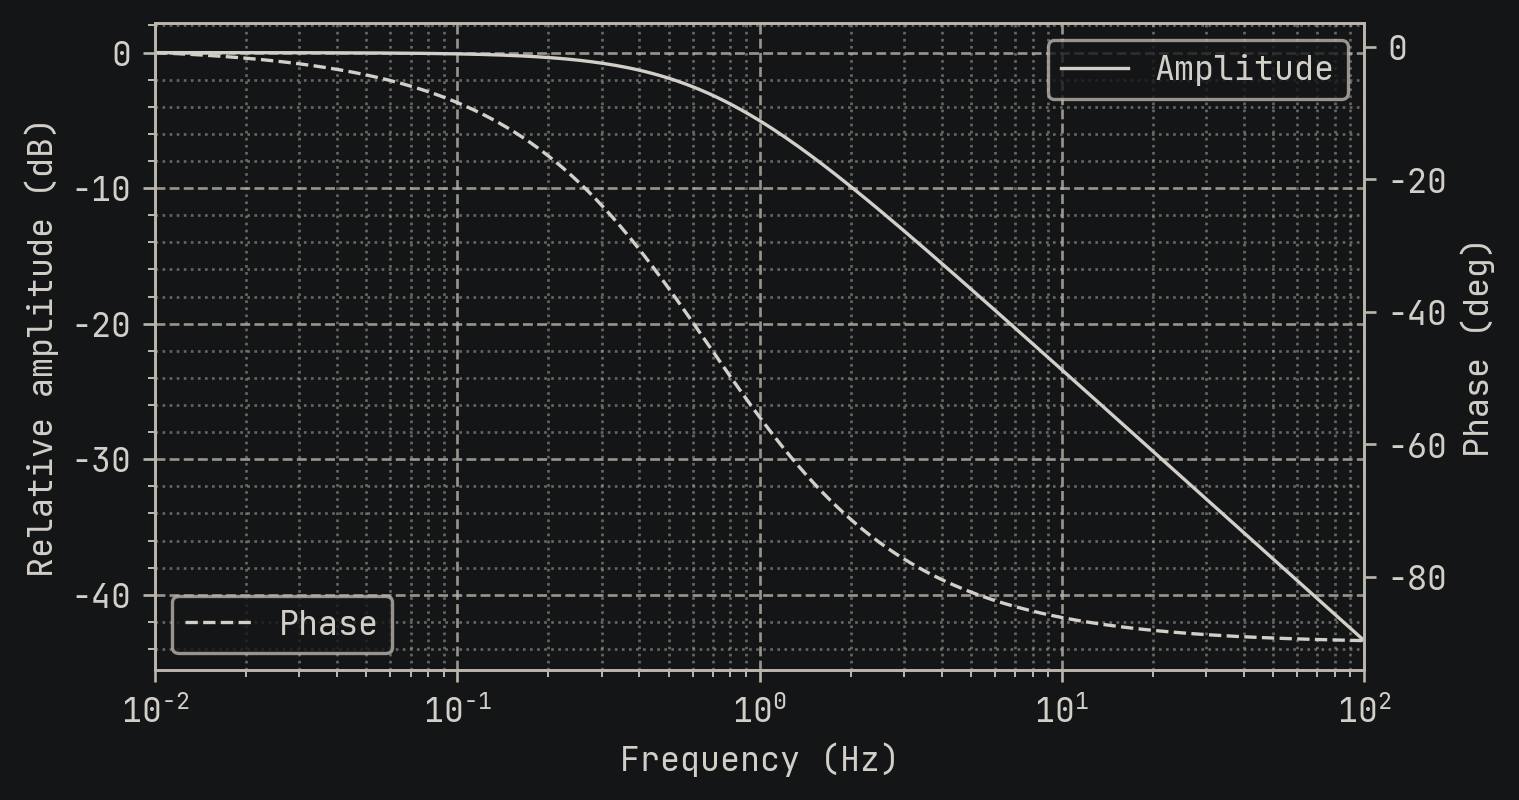

In [296]:
plt.figure(figsize = (6.5, 3.5))
ax1 = plt.subplot()
plt.semilogx(f, 20*np.log10(np.abs(h_s)), label = 'Amplitude', linewidth = 1)
plt.ylabel('Relative amplitude (dB)')
plt.xlabel('Frequency (Hz)')
ax1.legend(loc=0)
ax1.minorticks_on()
plt.grid(which="minor", linestyle = ":", alpha = 0.5)
plt.grid(which="major", linestyle = "--")
ax2 = ax1.twinx()
ax2.semilogx(f, np.degrees(np.angle(h_s)), label = 'Phase', linestyle = '--', linewidth = 1)
plt.ylabel('Phase (deg)')
ax2.legend(loc=3)
plt.xlim([np.min(f), np.max(f)])

plt.savefig('../../public/images/rc-filter/h_s.svg', dpi = 72, transparent=True, bbox_inches='tight')


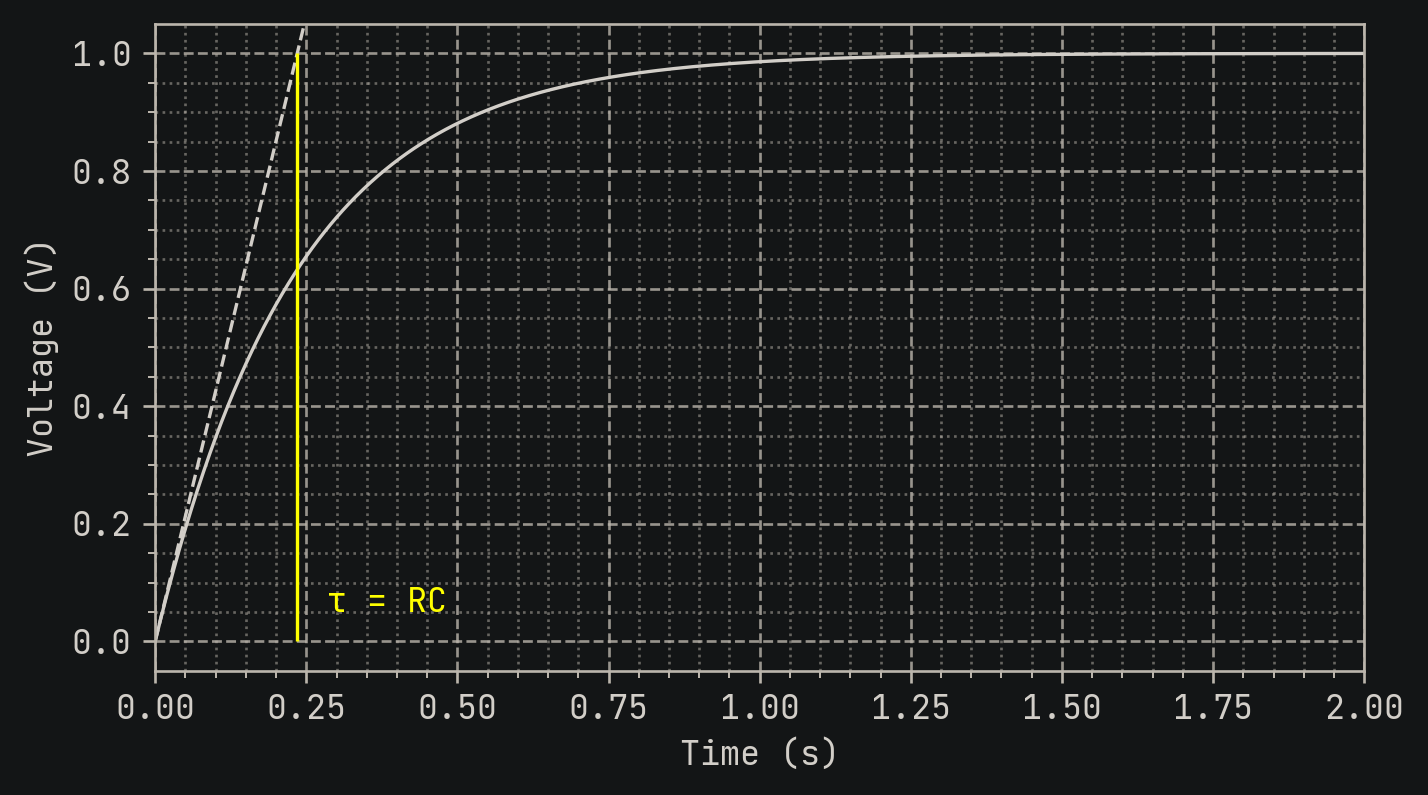

In [124]:
t = np.linspace(0, 2, 1000)
step = 1-np.exp(-t/(R*C))

plt.figure(figsize = (6.5, 3.5))
plt.plot(t, step, linewidth = 1)
plt.plot(t, t*1/(R*C), linestyle = "--", linewidth = 1)
plt.vlines(x=R*C, ymin = 0, ymax = 1, linewidth = 1 , color = "yellow")
plt.gca().minorticks_on()
plt.grid(which="minor", linestyle = ":", alpha = 0.5)
plt.grid(which="major", linestyle = "--")

plt.text(R*C+0.05, 0.05, s = 'τ = RC', color = "yellow")
plt.xlim([np.min(t), np.max(t)])
plt.ylim([-0.05, 1.05])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.savefig('../../public/images/rc-filter/time_response.svg', dpi = 72, transparent=True, bbox_inches='tight')

In [377]:
fs = 1000
N = 100
T = 1/fs
wc = 1/(R*C)

In [378]:
b = np.array([((T/2)*wc)/(1+(T/2)*wc), ((T/2)*wc)/(1+(T/2)*wc)])
a = np.array([1, ((T/2)*wc-1)/((T/2)*wc+1)])

In [379]:
from scipy.signal import lfilter

In [384]:
s = np.random.randn(int(1e7))
s_filt = lfilter(b, a, s)

In [390]:
s_fft = np.abs(np.fft.fft(s)[0:s.size//2])
s_filt_fft = np.abs(np.fft.fft(s_filt)[0:s.size//2])
f_fft = np.fft.fftfreq(s.size, T)[0:s.size//2]

In [413]:
re_filt = np.reshape(s_filt_fft, (s_filt_fft.size//N, N))
re = np.reshape(s_fft, (s_filt_fft.size//N, N))

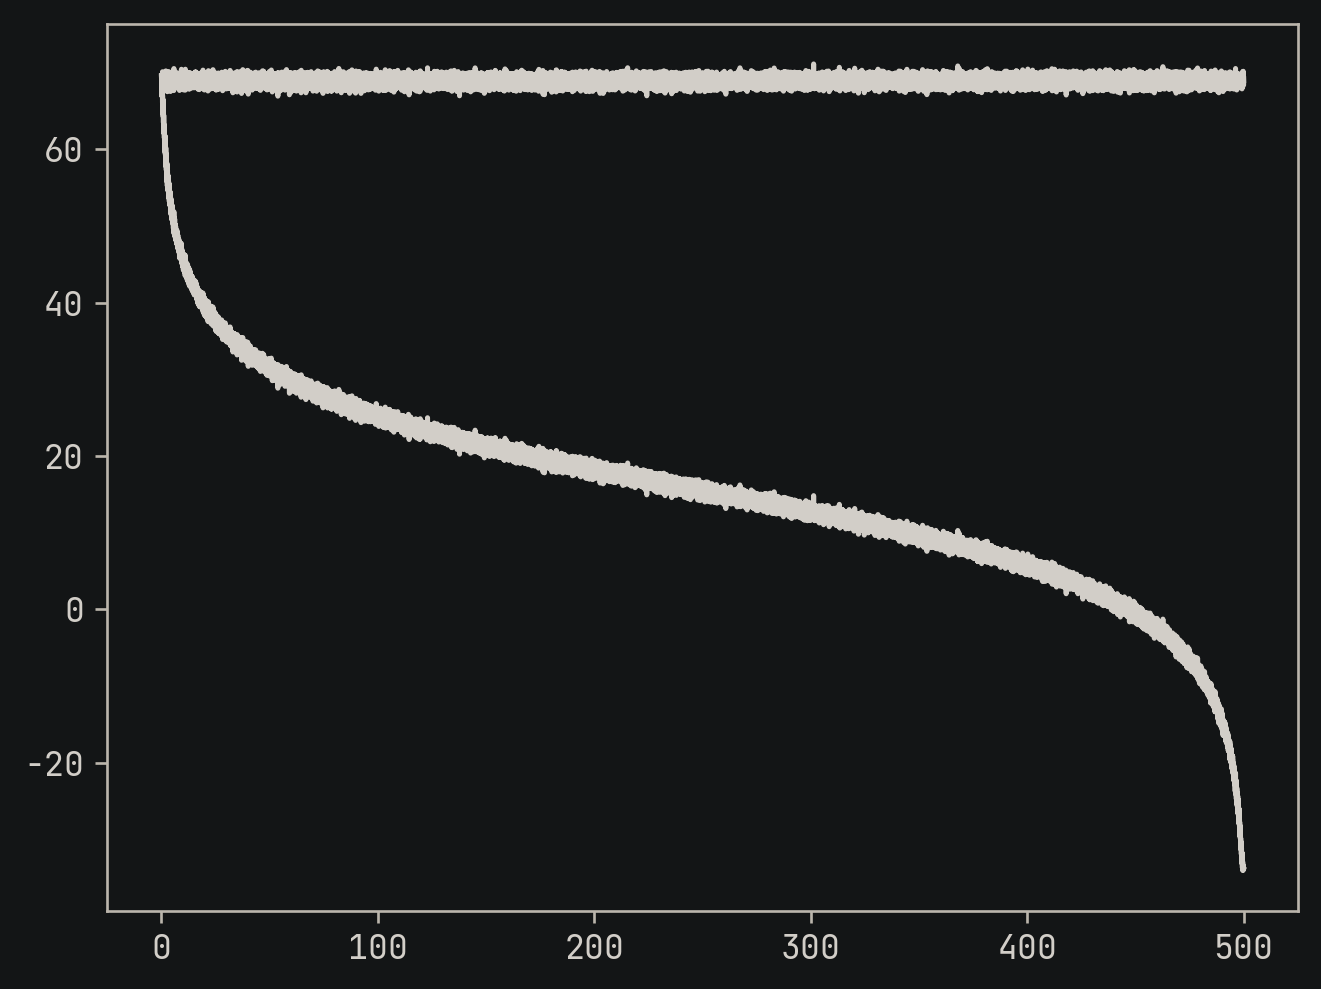

In [421]:
plt.plot(f_fft[::N], 20*np.log10(np.mean(re, axis = 1)))
plt.plot(f_fft[::N], 20*np.log10(np.mean(re_filt, axis = 1)))

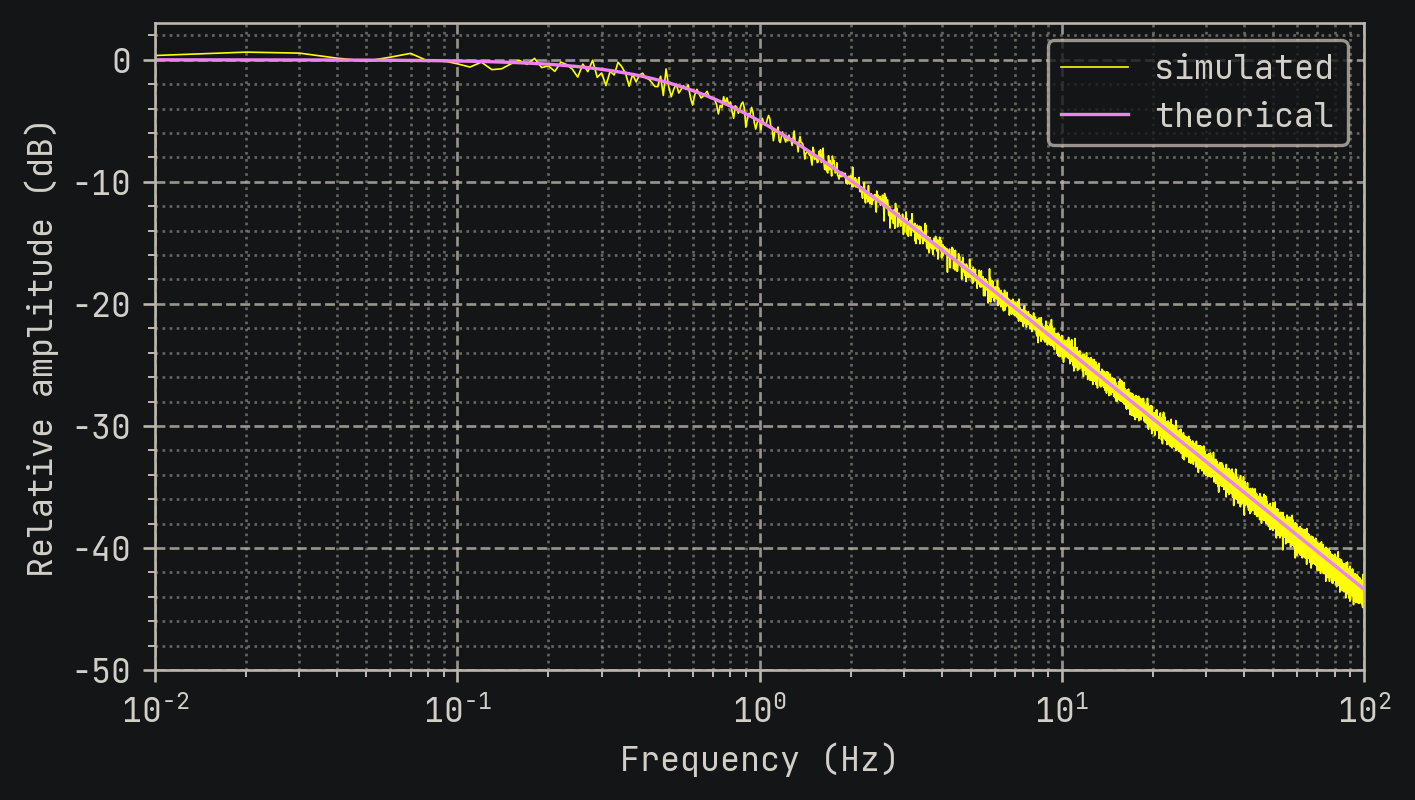

In [449]:
plt.figure(figsize = (6.5, 3.5))
plt.semilogx(f_fft[::N], 20*np.log10(np.mean(re_filt, axis = 1))-69, linewidth = 0.5, c = "yellow", label = 'simulated')
plt.semilogx(f, 20*np.log10(np.abs(h_s)), linewidth = 1, c = "violet", label = 'theorical')
plt.xlim([np.min(f), np.max(f)])
plt.ylim([-50, 3])
plt.gca().minorticks_on()
plt.grid(which="minor", linestyle = ":", alpha = 0.5)
plt.grid(which="major", linestyle = "--")
plt.ylabel('Relative amplitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.legend()